In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [96]:
! pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.graph_objects as go
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import  StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn import set_config
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import plot_tree
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
import math
from scipy.stats import norm

In [13]:
from datetime import datetime

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2_src = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2_src) * (n_samples - 1)) / (n_samples - n_features - 1)
    return adjusted_r2

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data_directory/Home_Prices_3.csv")

In [5]:
df.head(3)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,19800000.0,"901 dazzle., Powai, Mumbai - Central Line, Mah...",1281.0,19.124657,72.892539,2.0,2.0,1.0,Ready to Move,Resale,1.0,NaN,2.0,Opp. L&T Gate No. 5,Flat,\n\n\n Huge 2 B...,15456.674473
1,14800000.0,"Ishwar Nagar, Mumbai - Central Line, Maharashtra",1000.0,19.143829,72.934929,2.0,2.0,NaN,Ready to Move,Resale,NaN,Furnished,NaN,post office,Flat,\n \n \n...,14800.000000
2,37000000.0,"Prabhadevi, Mumbai - South Mumbai, Maharashtra",800.0,19.019862,72.832082,2.0,2.0,NaN,Ready to Move,Resale,NaN,NaN,NaN,NaN,Flat,\n,46250.000000


In [1]:
import pandas as pd
import math
def preprocess_dataframe(df):
    columns = ['Address', 'Status', 'desc', 'Landmarks', 'Price_sqft']
    df.drop(columns=columns, inplace=True)
    df.drop_duplicates(inplace=True)
    
    df.rename(columns={"Bedrooms": "bedrooms", "Bathrooms": "bathrooms", "Balcony": "balcony", "Furnished_status": "furnished_status",
                       "Lift": "lift"}, inplace=True)

    df['bedrooms'] = df['bedrooms'].apply(lambda row: 5.0 if row >= 5.0 else row)
    df['bathrooms'] = df['bathrooms'].apply(lambda row: 5.0 if row >= 5.0 else row)
    df['balcony'] = df['balcony'].apply(lambda row: 6.0 if row >= 6 else row)
    df['parking'] = df['parking'].apply(lambda row: 4.0 if row >= 4.0 else row)
    df['lift'] = df['lift'].apply(lambda row: 5.0 if row >= 5.0 else row)

    df['Total_Rooms'] = df['bedrooms'] + df['bathrooms']
    df['Approx_Avg_Area_Per_Room'] = df['area'] / df['Total_Rooms']
    df['Balcony_Ratio'] = df['balcony'] / df['bedrooms']
    df['Bathroom_Ratio'] = df['bathrooms'] / df['bedrooms']

    Hospital = {"PD Hinduja Hospital": [19.0332, 72.8391], "Lilavati Hospital": [19.0509, 72.8289], "Breach Candy Hospital": [18.9725, 72.8046],
                  "Wockhardt Hospital": [18.9759, 72.8244], "KEM Hospital": [19.0013, 72.8406], "JJ Hospital": [18.9631, 72.8336],
                  "Nair Hospital": [18.9727, 72.8212], "SevenHills Hospital": [19.1175, 72.8795], "Nanavati Super Speciality Hospital": [19.0957, 72.8402],
                  "Kokilaben Dhirubhai Ambani Hospital": [19.1312, 72.8248]}

    Schools = {"St Xavier": [19.1359, 72.9289], "Bombay Scottish": [19.0337, 72.8388], "Don Bosco": [19.0259, 72.8584],
               "Hansraj Morarji Public School": [19.11654, 72.82825], "St Anne":[19.19405, 72.8379]}

    Collages = {"KJ.Somaiya College": [19.0723, 72.9002], "Mithibai College": [19.1034, 72.8369], "Ruia College": [19.0237, 72.8502],
                "Jai Hind College": [18.9346, 72.8252], "Narsee Monjee College": [19.10390, 72.8370]}

    Street = {"Fashion Street": [19.076, 72.8777], "Bandra Linking Road": [19.0615, 72.8359], "Bandra Hill Road": [19.0555, 72.8322],
             "Colaba Causeway": [18.9218, 72.8347], "Crawford Market": [18.9463, 72.8352], "Malad West": [19.1827, 72.8401],
             "Natraj Market": [19.1152, 72.853], "Hindmata": [19.0062, 72.8405], "Grant Road": [18.9629, 72.81757],
             "Infiniti Mall": [19.1846, 72.8344], "RCity Mall": [19.0996, 72.9162], "Phoenix Marketcity": [19.0865, 72.8888], "Growel Mall": [19.2032, 72.8599]}

    Areas = {"South Mumbai": [19.0197, 72.8515], "Bandra": [19.0548, 72.8407], "Juhu": [19.0884, 72.8265], "Powai": [19.1176, 72.906],
             "BKC": [19.0688, 72.8703], "Worli": [18.9986, 72.8174], "Lower Parel": [18.9982, 72.8270], "Andheri West": [19.1364, 72.8296],
             "Goregaon East": [19.1663, 72.8526], "Thane": [19.2183, 72.9781]}

    def haversine_distance(lat1, lon1, lat2, lon2):
      lat1_rad = math.radians(lat1)
      lon1_rad = math.radians(lon1)
      lat2_rad = math.radians(lat2)
      lon2_rad = math.radians(lon2)

      dlat = lat2_rad - lat1_rad
      dlon = lon2_rad - lon1_rad
      a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
      c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
      R = 6371 
      distance = R * c
      return distance

    for key, value in Hospital.items():
      latitude, longitude = value
      df[key] = df.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], latitude, longitude), axis=1)

    for key, value in Schools.items():
      latitude, longitude = value
      df[key] = df.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], latitude, longitude), axis=1)

    for key, value in Collages.items():
      latitude, longitude = value
      df[key] = df.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], latitude, longitude), axis=1)

    for key, value in Street.items():
      latitude, longitude = value
      df[key] = df.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], latitude, longitude), axis=1)

    for key, value in Areas.items():
      latitude, longitude = value
      df[key] = df.apply(lambda row: haversine_distance(row['latitude'], row['longitude'], latitude, longitude), axis=1)
    
    return df

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

def Outler_Missing_value(df, folder_name):
    # Outlier
    numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    for column in numerical_columns:
        percentile25 = df[column].quantile(0.25)
        percentile75 = df[column].quantile(0.75)
        IQR = percentile75 - percentile25
        lower_limit = percentile25 - 1.5 * IQR
        upper_limit = percentile75 + 1.5 * IQR
        df[column] = np.where(df[column] > upper_limit,
                              upper_limit,
                               np.where(
                                df[column] < lower_limit,
                                lower_limit,
                                df[column]))
    
    
    data = {'25th_Percentile': percentile25, '75th_Percentile': percentile75, 
        'Upper_Limit': upper_limit, 'Lower_Limit': lower_limit}

    file_path = os.path.join(folder_name, 'data.txt')
    with open(file_path, 'w') as txt_file:
        for key, value in data.items():
            txt_file.write(f'{key}: {value}\n')
    
    # Missing value
    Missing_data = pd.DataFrame({'Missing count': df.isnull().sum(), 'Missing Percentage': (df.isnull().sum()/df.shape[0])*100})
    file_name = 'Missing_values.csv' 
    file_path = os.path.join(folder_name, file_name)
    Missing_data.to_csv(file_path, index=True)
    
    plt.figure(figsize=(15, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.savefig('{}/missing_value_plot.png'.format(folder_name))
    plt.close()
    
    df['furnished_status'].fillna("Not-Specified", inplace=True)
    plt.figure(figsize=(8, 4))
    plt.title("Count of different categories")
    sns.countplot(y='furnished_status', data=df);
    plt.savefig('{}/furnished_status.png'.format(folder_name))
    plt.close()
    
    return df

In [3]:
from scipy.stats import kurtosis
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm

def statistical_analysis(df, folder_name):
    
    numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    num_describe = df.describe(include=['float64', 'int64'])
    file_name = 'Numerical_description.csv' 
    file_path = os.path.join(folder_name, file_name)
    num_describe.to_csv(file_path, index=False)
    
    cat_describe = df.describe(include=['object'])
    file_name = 'Categorical_description.csv' 
    file_path = os.path.join(folder_name, file_name)
    cat_describe.to_csv(file_path, index=False)

    def cofficient_of_variation(column):
      mean = column.mean()
      std_dev = column.std()
      return (std_dev / mean) * 100

    cv_data = {col: cofficient_of_variation(df[col]) for col in numerical_columns}
    cv_df = pd.DataFrame(cv_data, index=['Coefficient of Variation'])
    plt.figure(figsize=(25, 10))
    sns.barplot(data=cv_df)
    plt.title("Coefficient of Variation for Each Column")
    plt.xlabel('Columns')
    plt.ylabel('Coefficient of Variation (%)')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.savefig('{}/Cofficient_of_variation_plot.png'.format(folder_name))
    plt.close()


    skewness_data = df[numerical_columns].skew()

    skewness_classification = []
    for skew_value in skewness_data:
      if skew_value > 0.5 and skew_value < 1:
        skew_type = "Right Skew"
      elif skew_value > -0.5 and skew_value < 0.5:
        skew_type = "Almost Symmetrical"
      elif skew_value < -0.5:
        skew_type = "Left Skew"
      skewness_classification.append(skew_type)

    plt.figure(figsize=(25, 10))
    sns.barplot(x=skewness_data.index.tolist(), y=skewness_data.values.tolist(), hue=skewness_classification)
    plt.title('Skewness Classification for Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Skewness')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.legend(title="Skewness Classification")
    plt.savefig('{}/Skewness_analysis_plot.png'.format(folder_name))
    plt.close()

    kurtosis_data = kurtosis(df[numerical_columns])

    kurtosis_ = []
    for value in kurtosis_data:
      if value > 0:
        type_ = "Peaked"
      elif value < 0:
        type_ = "Flat"
      else:
        type_ = "Similar to Normal"
      kurtosis_.append(type_)

    plt.figure(figsize=(25, 10))
    sns.barplot(x=numerical_columns, y=kurtosis_data.tolist(), hue=kurtosis_)
    plt.title('Kurtosis Classification for Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Kurtosis')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.legend(title="Kurtosis Classification")
    plt.savefig('{}/Kurtosis_analysis_plot.png'.format(folder_name))
    plt.close()

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
from sklearn.decomposition import PCA

def visulizations(df, folder_name):
    
    numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=df['latitude'], y=df['longitude'], hue=df['price'])
    plt.title('Latitude vs Longitude Scatterplot')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.savefig('{}/1_Map_visulization_plot.png'.format(folder_name))
    plt.close()

    num_rows = (len(numerical_columns) + 2) // 3
    num_cols = 3
    plt.figure(figsize=(20, 6 * num_rows))

    for i, column in enumerate(numerical_columns):
        plt.subplot(num_rows, num_cols, i+1)
        sns.scatterplot(x=df[column], y=df['price'])
        plt.title("Price vs {}".format(column), fontsize=14)
        plt.xlabel(column, fontsize=14)
        plt.ylabel("price", fontsize=14)

    plt.tight_layout()
    plt.savefig('{}/2_Scatter_plot.png'.format(folder_name))
    plt.close()
    

    num_rows = (len(numerical_columns) + 2) // 3
    num_cols = 3
    plt.figure(figsize=(20, 6 * num_rows))

    for i, column in enumerate(numerical_columns):
        if column in ['balcony', 'parking', 'lift']:
          plt.subplot(num_rows, num_cols, i+1)
          sns.histplot(x=df[column].fillna(0.1), bins=10, kde=True)
          plt.title(column, fontsize=14)
          plt.xlabel("Distrubution", fontsize=14)
          plt.ylabel("Count", fontsize=14)
        else:
          plt.subplot(num_rows, num_cols, i+1)
          sns.histplot(x=df[column], bins=10, kde=True)
          plt.title(column, fontsize=14)
          plt.xlabel("Distrubution", fontsize=14)
          plt.ylabel("Count", fontsize=14)

    plt.tight_layout()
    plt.savefig('{}/3_Histogram_plot.png'.format(folder_name))
    plt.close()

    num_rows = (len(numerical_columns) + 2) // 3
    num_cols = 3
    plt.figure(figsize=(20, 6 * num_rows))

    for i, column in enumerate(numerical_columns):
      plt.subplot(num_rows, num_cols, i+1)
      sns.boxplot(data=df[column])
      plt.title(column, fontsize=14)

    plt.tight_layout()
    plt.savefig('{}/4_Box_plot.png'.format(folder_name))
    plt.close()

    num_rows = (len(categorical_columns) + 2) // 3
    num_cols = 3
    plt.figure(figsize=(20, 6 * num_rows))

    for i, column in enumerate(categorical_columns):
      plt.subplot(num_rows, num_cols, i+1)
      sns.countplot(x=column, data=df)
      plt.title(column, fontsize=14)

    plt.tight_layout()
    plt.savefig('{}/5_Categorical_count_plot.png'.format(folder_name))
    plt.close()

    num_rows = (len(categorical_columns) + 2) // 3
    num_cols = 3
    plt.figure(figsize=(20, 6 * num_rows))
    for i, column in enumerate(categorical_columns):
      plt.subplot(num_rows, num_cols, i+1)
      palette_color = sns.color_palette('bright')
      plt.pie(x=df[column].value_counts() / df.shape[0] * 100, labels=df[column].value_counts().index.tolist(), autopct="%.0f%%")
      plt.title(column, fontsize=14)

    plt.tight_layout()
    plt.savefig('{}/6_Categorical_pie_plot.png'.format(folder_name))
    plt.close()

    pca = PCA(n_components=2, random_state=42)
    embedded_data = pca.fit_transform(df.drop(columns = ['neworold', 'furnished_status', 'balcony',  'type_of_building', 'parking', 'lift']).fillna(0.1))
    data = {'Dimension 1': embedded_data[:, 0],
            'Dimension 2': embedded_data[:, 1],
            'price': df['price']}
    df_plot = pd.DataFrame(data)
    
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df_plot, x='Dimension 1', y='Dimension 2', hue='price', palette='viridis')
    plt.title('PCA Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.savefig('{}/7_Pca_visualization.png'.format(folder_name))
    plt.close()

    correlation_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(20, 20))
    sns.heatmap(data=correlation_matrix, cmap='RdBu', annot=True, fmt=".2f", cbar=True)
    plt.title('Correlation Matrix')
    plt.xlabel('Feature')
    plt.ylabel('Feature')
    plt.savefig('{}/8_Correlation_matrix.png'.format(folder_name))
    plt.close()

In [5]:
import pandas as pd
import os

def data_drift_detector(data_df, sample_df, folder_name):
    columns_names = data_df.select_dtypes(exclude=['object']).columns.tolist()
    columns_names = [column for column in columns_names if column not in ['price']]
    
    mean_std = []
    for column in columns_names:
      dictionary = {}
      dictionary['mean'] = data_df[column].mean()
      dictionary['std'] = data_df[column].std()
      mean_std.append(dictionary)

    mean_and_std_pop = pd.DataFrame({columns_names[0]: mean_std[0], columns_names[1]: mean_std[1], columns_names[2]: mean_std[2], columns_names[3]: mean_std[3],
                                 columns_names[4]: mean_std[4], columns_names[5]: mean_std[5], columns_names[6]: mean_std[6], columns_names[7]: mean_std[7]})

    mean_std = []
    for column in columns_names:
      dictionary = {}
      dictionary['mean'] = sample_df[column].mean()
      dictionary['std'] = sample_df[column].std()
      mean_std.append(dictionary)

    mean_and_std_sample = pd.DataFrame({columns_names[0]: mean_std[0], columns_names[1]: mean_std[1], columns_names[2]: mean_std[2], columns_names[3]: mean_std[3],
                                       columns_names[4]: mean_std[4], columns_names[5]: mean_std[5], columns_names[6]: mean_std[6], columns_names[7]: mean_std[7]})
    mean_and_std_sample

    sample_size = 30
    alpha = 0.05
    z_test_values = []
    for i in range(len(columns_names)):
      values = {}
      values['Column'] = columns_names[i]
      values['ZScore'] = (mean_and_std_sample.iloc[0, i] - mean_and_std_pop.iloc[0, i]) / (mean_and_std_pop.iloc[1, i] / math.sqrt(sample_size))
      values['critical_z'] = abs(norm.ppf(alpha / 2))
      if abs(values['ZScore']) > values['critical_z']:
        values['Result'] = 'There is difference'
      else:
        values['Result'] = 'There is no difference'
      z_test_values.append(values)

    Z_test_results = pd.DataFrame(z_test_values)
    file_name = 'data_drift_results.csv' 
    file_path = os.path.join(folder_name, file_name)
    Z_test_results.to_csv(file_path, index=False)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import  StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import joblib

def adjusted_r2_score(y_true, y_pred, n_samples, n_features, exp_name):
    r2_src = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2_src) * (n_samples - 1)) / (n_samples - n_features - 1)
    return adjusted_r2


def create_experiment(experiment_name, run_name, run_metrics):
    import mlflow
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run():
        for metric, value in run_metrics.items():
            mlflow.log_metric(metric, value)

    print(f'Run - {run_name} is logged to Experiment - {experiment_name}')

def model_training_evaluation(df, folder_name, model_repo, features):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price'], axis=1), df['price'], test_size=0.20, random_state=42)
    
    step1 = ColumnTransformer([
        ('ordinal_encoder', OrdinalEncoder(categories=[['Resale', 'New Property']]), [6])
    ], remainder='passthrough')

    step2 = ColumnTransformer([
        ('ohe_encoder', OneHotEncoder(drop='first', sparse_output=False), [8, 10])
    ], remainder='passthrough')

    step3 = ColumnTransformer([
        ('scaler', RobustScaler(), list(range(5, 60)))
    ], remainder='passthrough')

    step4 = ColumnTransformer([
        ('knn_imputer', KNNImputer(n_neighbors=3, weights='distance'), [5, 6, 7, 10])
    ], remainder='passthrough')

    step5 = ColumnTransformer([
        ('power_transform', PowerTransformer(method='yeo-johnson'), list(range(0, 60)))
    ], remainder='passthrough')

    step6 = GradientBoostingRegressor()

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2),
        ('step3', step3),
        ('step4', step4),
        ('step5', step5),
        ('step6', step6)
    ])
    
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    train_r2_adj = adjusted_r2_score(y_train, y_train_pred, X_train.shape[0], X_train.shape[1])

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    test_r2_adj = adjusted_r2_score(y_test, y_test_pred, X_test.shape[0], X_test.shape[1])
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    score = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='r2')
    score_mean = score.mean()
    
    data = {'Train_MAE': train_mae, 'Train_MSE': train_mse, 'Train_RMSE' : train_rmse,
            'Train_R2_Score': train_r2, 'Train_Adj-R2_Score': train_r2_adj}

    file_path = os.path.join(folder_name, 'train_results.txt')
    with open(file_path, 'w') as txt_file:
        for key, value in data.items():
            txt_file.write(f'{key}: {value}\n')
            
    data = {'Test_MAE': test_mae, 'Test_MSE': test_mse, 'Test_RMSE' : train_rmse,
            'Test_R2_Score': train_r2, 'Test_Adj-R2_Score': train_r2_adj}

    file_path = os.path.join(folder_name, 'test_results.txt')
    with open(file_path, 'w') as txt_file:
        for key, value in data.items():
            txt_file.write(f'{key}: {value}\n')
            
    file_path = os.path.join(folder_name, 'cv_score.txt')
    with open(file_path, 'w') as txt_file:
        txt_file.write("Cross Validation Score: {}".format(score_mean))

    run_metrics = {"Train_MAE": train_mae, "Train_MSE": train_mse, "Train_RMSE": train_rmse, "Train_R2": train_r2, 
                   "Train_Adj-R2_Score": train_r2_adj,  "Test_MAE": test_mae, "Test_MSE": test_mse, "Test_RMSE": test_rmse,
                    "Test_R2": test_r2, "Test_Adj-R2_Score": train_r2_adj "Cross-Validation_Score": score_mean}
    create_experiment(experiment_name, "First_Run", run_metrics)
        
    importances = pipe.named_steps['step6'].feature_importances_
    feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    sor_feature_imp_df = feature_imp_df.sort_values('Importance', ascending=False)
    feature_importances = sor_feature_imp_df['Importance'].values
    feature_names = sor_feature_imp_df['Feature'].values

    data = {'Feature': feature_names,
            'Importance': feature_importances}
    df_plot = pd.DataFrame(data)

    plt.figure(figsize=(25, 10))
    sns.barplot(data=df_plot, x='Feature', y='Importance', palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=-45)
    plt.savefig('{}/Feature_Importance_plot.png'.format(folder_name))
    plt.close()
 
    model_name = "xgboost_model.pkl"  
    model_filepath = os.path.join(model_repo, model_name)
    joblib.dump(pipe, model_filepath)

In [7]:
! pip install shap


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import  StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def model_explanability(df, folder_name, features):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['price'], axis=1), df['price'], test_size=0.20, random_state=42)
    
    step1 = ColumnTransformer([
        ('ordinal_encoder', OrdinalEncoder(categories=[['Resale', 'New Property']]), [6])
    ], remainder='passthrough')

    step2 = ColumnTransformer([
        ('ohe_encoder', OneHotEncoder(drop='first', sparse_output=False), [8, 10])
    ], remainder='passthrough')

    step3 = ColumnTransformer([
        ('scaler', RobustScaler(), list(range(5, 60)))
    ], remainder='passthrough')

    step4 = ColumnTransformer([
        ('knn_imputer', KNNImputer(n_neighbors=3, weights='distance'), [5, 6, 7, 10])
    ], remainder='passthrough')

    step5 = ColumnTransformer([
        ('power_transform', PowerTransformer(method='yeo-johnson'), list(range(0, 60)))
    ], remainder='passthrough')

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2),
        ('step3', step3),
        ('step4', step4),
        ('step5', step5),
    ])

    X_train_trf = pipe.fit_transform(X_train, y_train)
    X_test_trf = pipe.transform(X_test)

    model = GradientBoostingRegressor()
    model.fit(X_train_trf, y_train)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train_trf)
    
    shap.summary_plot(shap_values, X_train_trf, feature_names=features, plot_type='bar')
    plt.savefig('{}/11_shap_summary_plot.png'.format(folder_name), bbox_inches='tight')
    plt.close()
    
    shap.summary_plot(shap_values, X_train_trf, feature_names=features)
    
    feature_idx = 0
    shap.dependence_plot(feature_idx, shap_values, X_train_trf, feature_names=features)
    
    shap.initjs()
    instance_idx = 0
    shap.plots.force(explainer.expected_value, shap_values[instance_idx], X_train_trf[instance_idx], feature_names = features)
    
    shap.plots.decision(explainer.expected_value, explainer.shap_values(X_train_trf), feature_order='importance', feature_names = features, ignore_warnings=True)
    
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[0:5,:], X_train_trf[0:5,:], plot_cmap="DrDb", feature_names=features)

In [10]:
import os
import shutil

In [17]:
current_datetime = datetime.now()
folder_name = current_datetime.strftime("%Y_%m_%d_%H_%M")
data_dir = "data_directory"
oul_miss_dir = "handle_outlier_missing value"
stat_dir = "data_statistics"
vis_dir = "visualizations"
model_reg = "model_repository"
model_eval = "model_evaluation"
model_expl = "model_explainability"

os.mkdir(folder_name)
source_path = folder_name
oul_miss_dir_path = os.path.join(oul_miss_dir, folder_name)
stat_dir_path = os.path.join(stat_dir, folder_name)
vis_dir_path = os.path.join(vis_dir, folder_name)
model_reg_dir_path = os.path.join(model_reg, folder_name)
model_eval_dir_path = os.path.join(model_eval, folder_name)
model_expl_dir_path = os.path.join(model_expl, folder_name)

shutil.copytree(source_path, oul_miss_dir_path)
shutil.copytree(source_path, stat_dir_path)
shutil.copytree(source_path, vis_dir_path)
shutil.copytree(source_path, model_reg_dir_path)
shutil.copytree(source_path, model_eval_dir_path)
shutil.copytree(source_path, model_expl_dir_path)

shutil.rmtree(folder_name)

In [18]:
features = ['area', 'latitude', 'longitude', 'bedrooms', 'bathrooms', 'balcony', 'parking', 'lift', 'Total_Rooms',
            'Approx_Avg_Area_Per_Room', 'Balcony_Ratio', 'Bathroom_Ratio', 'PD Hinduja Hospital', 'Lilavati Hospital',
            'Breach Candy Hospital', 'Wockhardt Hospital', 'KEM Hospital', 'JJ Hospital', 'Nair Hospital',
            'SevenHills Hospital', 'Nanavati Super Speciality Hospital', 'Kokilaben Dhirubhai Ambani Hospital',
            'St Xavier', 'Bombay Scottish', 'Don Bosco', 'Hansraj Morarji Public School', 'St Anne','KJ.Somaiya College',
            'Mithibai College', 'Ruia College', 'Jai Hind College', 'Narsee Monjee College', 'Fashion Street',
            'Bandra Linking Road', 'Bandra Hill Road', 'Colaba Causeway', 'Crawford Market', 'Malad West', 
            'Natraj Market', 'Hindmata', 'Grant Road', 'Infiniti Mall', 'RCity Mall', 'Phoenix Marketcity','Growel Mall', 
            'South Mumbai', 'Bandra', 'Juhu', 'Powai', 'BKC', 'Worli', 'Lower Parel', 'Andheri West', 'Goregaon East',
            'Thane', 'Not-Specified', 'Semi-Furnished', 'Unfurnished', 'Individual House', 'neworold']

In [167]:
from preprocessing import preprocess_dataframe
from handle_missing_value_outlier import Outler_Missing_value
from statistical_analysis_plot import statistical_analysis
from plot_visulizations import visulizations
from data_drift_detection import data_drift_detector
from model_training_evaluation_ import model_training_evaluation
from explainability_of_model import model_explanability

ImportError: cannot import name 'preprocess_dataframe' from 'preprocessing' (C:\Users\ABC\Desktop\New Final Projects\House Price Predictions\New folder\preprocessing.py)

In [20]:
filename = [os.listdir(data_dir)][0][-1]
filepath = os.path.join(data_dir, filename)
df = pd.read_csv(filepath)
df = preprocess_dataframe(df)
df = Outler_Missing_value(df, oul_miss_dir_path)
statistical_analysis(df, stat_dir_path)
visulizations(df, vis_dir_path)
model_training_evaluation(df, model_eval_dir_path, model_reg_dir_path, features)
model_explanability(df, model_expl_dir_path, features)

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.


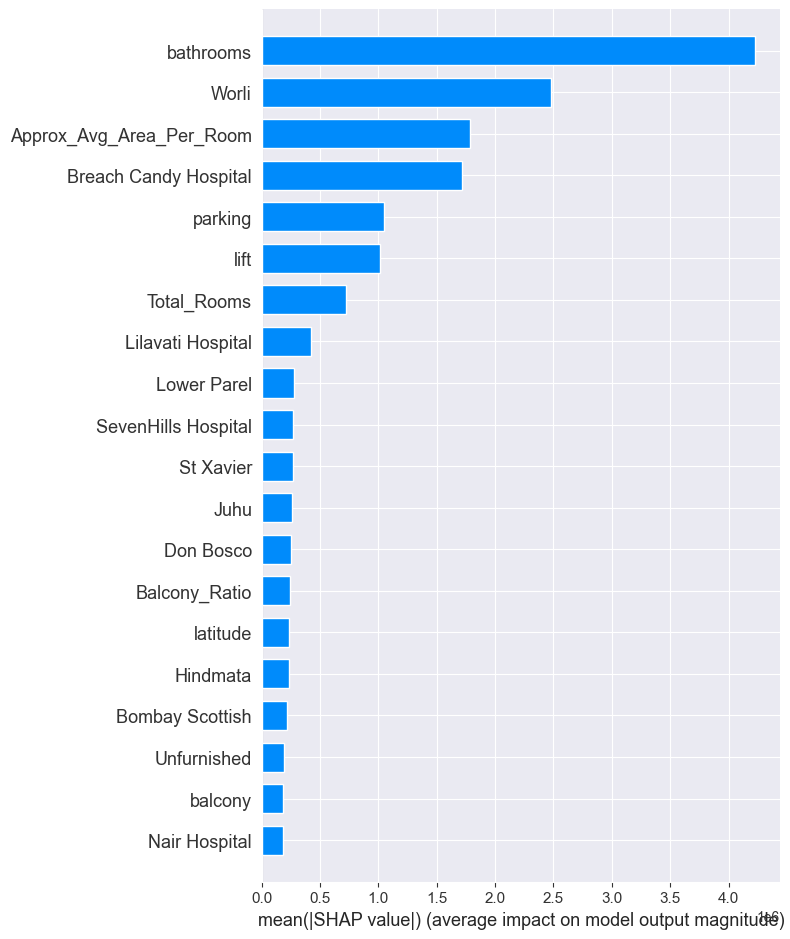

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


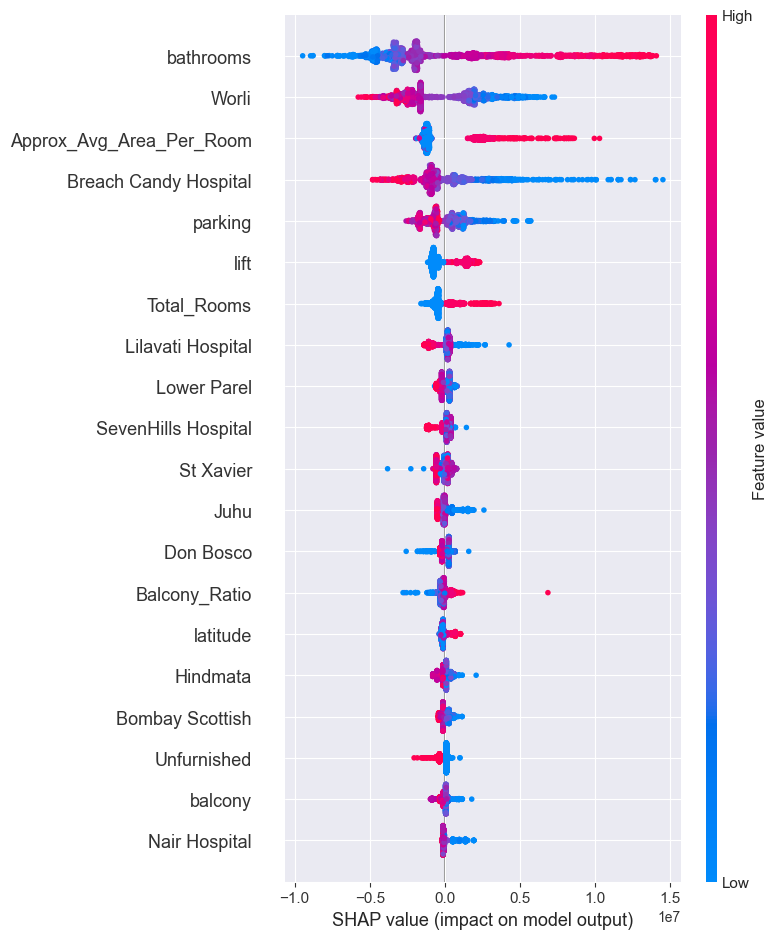

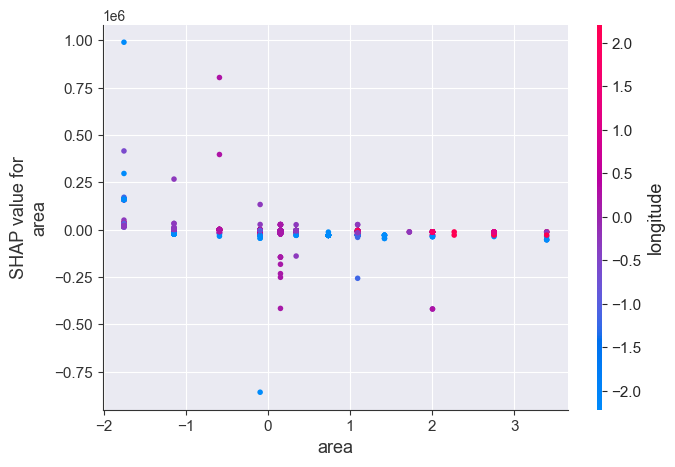

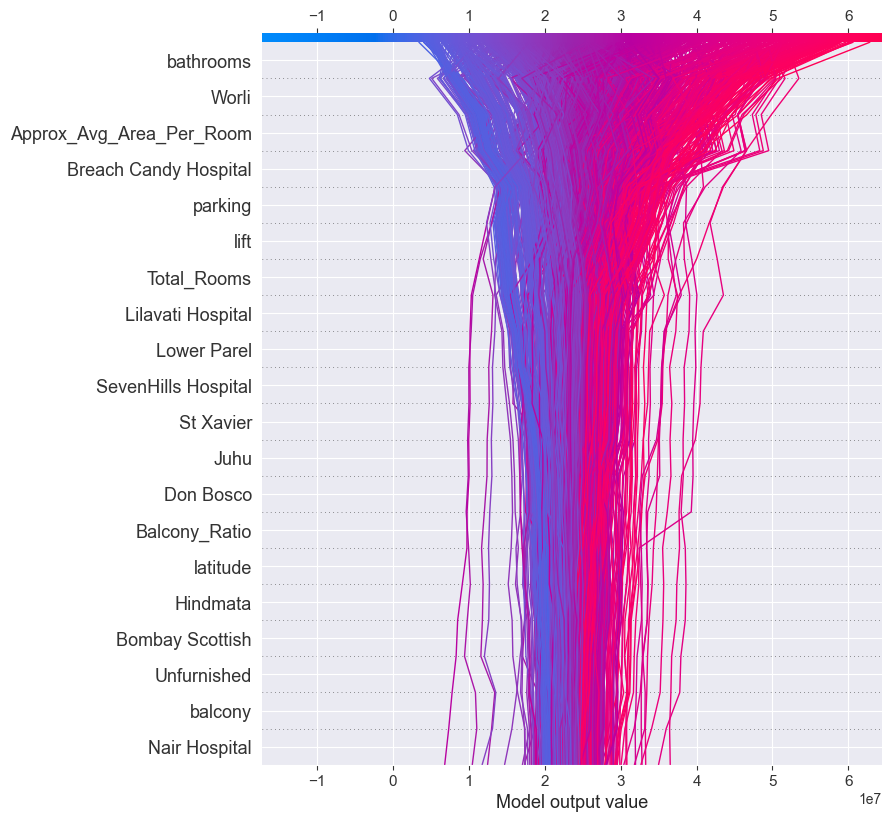

In [25]:
model_explanability(df, model_expl_dir_path, features)

In [26]:
! pip install mlflow

     -------------------------------------- 18.5/18.5 MB 880.7 kB/s eta 0:00:00
     -------------------------------------- 83.5/83.5 kB 519.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
     ------------------------------------ 226.0/226.0 kB 863.2 kB/s eta 0:00:00
     ------------------------------------ 148.1/148.1 kB 551.4 kB/s eta 0:00:00
     -------------------------------------- 96.1/96.1 kB 923.4 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 57.7/57.7 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 78.7/78.7 kB 728.0 kB/s eta 0:00:00
     -------------------------------------- 242.2/242.2 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 192.5/192.5 kB 1.3 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
def create_experiment(experiment_name, run_name, run_train_metrics, run_test_metrics, run_val_metrics, run_cross_val_score):
    import mlflow
    mlflow.set_experiment(experiment_name)

    with mlflow.start_run():
      for metric, value in run_train_metrics.items():
        mlflow.log_metric("Train_" + metric, value)

      for metric, value in run_test_metrics.items():
        mlflow.log_metric("Test_" + metric, value)

      for metric, value in run_val_metrics.items():
        mlflow.log_metric("Validation_" + metric, value)

      mlflow.log_metric("Cross-Validation Score", run_cross_val_score)

      mlflow.set_tag("tag1", experiment_name)

    print('Run - %s is logged to Experiment - %s' % (run_name, experiment_name))

In [ ]:
experiment_name = "Elastic_Net_Regression"
run_name = "First_Run"
create_experiment(experiment_name, run_name, train_elnet_results, test_elnet_results, val_elnet_results, elnet_score_mean)

In [1]:
import mysql.connector

In [ ]:
class DataBaseHelper:
    def __init__(self):
        try:
            self.connection = mysql.connector.connect(host = '127.0.0.1',
                                                      user = 'root',
                                                      password = 'admin',
                                                      database = 'restaurants_orders')
            self.mycursor = self.connection.cursor()
            print("Connection Establish")
        except:
            print("Connection Error")
    def insert_values(self, data):
        area, latitude, longitude, bedrooms, bathrooms, balcony, neworold, parking, furnished_status, lift, type_of_building = data
        query = """
        INSERT INTO home_prices
        VALUES ({area}, {latitude}, {longitude}, {bedrooms}, {bathrooms}, 
        {balcony}, {neworold}, {parking}, {furnished_status}, {lift}, {type_of_building});
        """.format(area, latitude, longitude, bedrooms, bathrooms, balcony, neworold, parking, furnished_status, lift, type_of_building)
        self.mycursor.execute(query)
        self.mycursor.commit()

In [ ]:
features = [area, latitude, longitude, process(bedrooms), process(bathrooms), process(balcony), neworold, 
            process(parking), furnished_status, process(lift), type_of_building]

In [ ]:
INSERT INTO table_name
VALUES (value1, value2, value3, ...);